In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [2]:
ls

1533148922_PBL 5 recommendation data.csv
Movie Example/
README.md
Recommender_for_sales_data.ipynb


In [3]:
df = pd.read_csv('1533148922_PBL 5 recommendation data.csv', encoding = "ISO-8859-1")
df.head()

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (20,33,73,106,158) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN,NaN
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN,NaN


In [4]:
def getelbowplot(df_in, y_scale, upperbound):

    sse = []
    silhouette = []
    K = range(1,upperbound)
    for k in K:
        
        km = KMeans(n_clusters=k).fit(df_in)
        sse.append(km.inertia_)
        if k != 1:
            silhouette.append(silhouette_score(df_in, km.labels_))
        else:
            silhouette.append(0)

        
    fig = plt.figure(figsize=(5,10))

    plt.subplot(2, 1, 1)    
    plt.yscale(y_scale)
    plt.plot(K, sse, 'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Distortion vs Number of Clusters')
    
    plt.subplot(2, 1, 2)
    plt.yscale(y_scale)
    plt.plot(K, silhouette, 'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs Number of Clusters')
    
    plt.show()

In [5]:
[print(elem) for elem in df]

Customers.id
Customers.fname
Customers.lname
Customers.company
Customers.create_date
Customers.status
Customers.mailing
Customers.reminders
Customers.tax_exempt
Customers.account_id
Customers.sales_rep
Customers.rewards
Customers.profile_id
Customers.last_modified
Customers.customer_type
Orders.id
Orders.customer_id
Orders.fname
Orders.lname
Orders.company
Orders.order_number
Orders.reorder_id
Orders.external_source
Orders.external_id
Orders.currency
Orders.sales_rep
Orders.subtotal
Orders.tax
Orders.shipping
Orders.coupon_id
Orders.coupon_amount
Orders.gift_id
Orders.gift_amount
Orders.fee_name
Orders.fee_amount
Orders.discount_name
Orders.discount_amount
Orders.total
Orders.balance_due
Orders.shipping_carrier
Orders.shipping_method
Orders.shipping_trans
Orders.shipping_flags
Orders.weight
Orders.tracking
Orders.payment_status
Orders.payment_date
Orders.payment_user
Orders.payment_type
Orders.payment_method
Orders.payment_amount
Orders.purchase_order
Orders.payment_id
Orders.payment_c

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [6]:
customer_df = df.loc[:, df.columns.str.startswith('Customers')]
orders_df = df.loc[:, df.columns.str.startswith('Orders')]
orderitems_df = df.loc[:, df.columns.str.startswith('Order_Items')]
products_df = df.loc[:, df.columns.str.startswith('Products')]

### Customers DataFrame

In [7]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 15 columns):
Customers.id               4194 non-null int64
Customers.fname            4194 non-null object
Customers.lname            4194 non-null object
Customers.company          727 non-null object
Customers.create_date      4194 non-null int64
Customers.status           101 non-null float64
Customers.mailing          2114 non-null float64
Customers.reminders        0 non-null float64
Customers.tax_exempt       5 non-null float64
Customers.account_id       3 non-null float64
Customers.sales_rep        0 non-null float64
Customers.rewards          0 non-null float64
Customers.profile_id       0 non-null float64
Customers.last_modified    4194 non-null int64
Customers.customer_type    3771 non-null float64
dtypes: float64(9), int64(3), object(3)
memory usage: 491.6+ KB


In [8]:
customer_df.isnull().sum()

Customers.id                  0
Customers.fname               0
Customers.lname               0
Customers.company          3467
Customers.create_date         0
Customers.status           4093
Customers.mailing          2080
Customers.reminders        4194
Customers.tax_exempt       4189
Customers.account_id       4191
Customers.sales_rep        4194
Customers.rewards          4194
Customers.profile_id       4194
Customers.last_modified       0
Customers.customer_type     423
dtype: int64

In [9]:
for elem in customer_df:
    if customer_df[elem].isnull().sum() > 500:
        customer_df.drop(elem, axis=1, inplace=True)

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
customer_df.isnull().sum()

Customers.id                 0
Customers.fname              0
Customers.lname              0
Customers.create_date        0
Customers.last_modified      0
Customers.customer_type    423
dtype: int64

In [11]:
customer_df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Customers.customer_type
0,797,Christy,Dill,1426018724,1437764306,0.0
1,3,John,Smith,1386089139,1437764354,0.0
2,3,John,Smith,1386089139,1437764354,0.0
3,4,James,Anderson,1386780263,1437762646,0.0
4,5,Abraham,Pollak,1386861599,1437764316,0.0


In [12]:
customer_df['Customers.last_modified'] = pd.to_datetime(customer_df['Customers.last_modified'], unit='s')
customer_df['Customers.create_date'] = pd.to_datetime(customer_df['Customers.create_date'], unit='s')
customer_df['Customers.last_modified'] = customer_df['Customers.last_modified'].apply(lambda x: x.date())
customer_df['Customers.create_date'] = customer_df['Customers.create_date'].apply(lambda x: x.date())
#customer_df['Customers.days_diff'] = (customer_df['Customers.last_modified'] - customer_df['Customers.create_date']).apply(lambda x: x.days)
customer_df['Customers.days_diff'] = (customer_df['Customers.last_modified']).apply(lambda x: (pd.datetime.now().date() - x).days)


#now - last modified!  when was the last time they bought

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [13]:
customer_df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Customers.customer_type,Customers.days_diff
0,797,Christy,Dill,2015-03-10,2015-07-24,0.0,1660
1,3,John,Smith,2013-12-03,2015-07-24,0.0,1660
2,3,John,Smith,2013-12-03,2015-07-24,0.0,1660
3,4,James,Anderson,2013-12-11,2015-07-24,0.0,1660
4,5,Abraham,Pollak,2013-12-12,2015-07-24,0.0,1660


In [14]:
customer_df['Customers.customer_type'] = customer_df['Customers.customer_type'].fillna('median')

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
customer_df.isnull().sum()

Customers.id               0
Customers.fname            0
Customers.lname            0
Customers.create_date      0
Customers.last_modified    0
Customers.customer_type    0
Customers.days_diff        0
dtype: int64

In [16]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 7 columns):
Customers.id               4194 non-null int64
Customers.fname            4194 non-null object
Customers.lname            4194 non-null object
Customers.create_date      4194 non-null object
Customers.last_modified    4194 non-null object
Customers.customer_type    4194 non-null object
Customers.days_diff        4194 non-null int64
dtypes: int64(2), object(5)
memory usage: 229.5+ KB


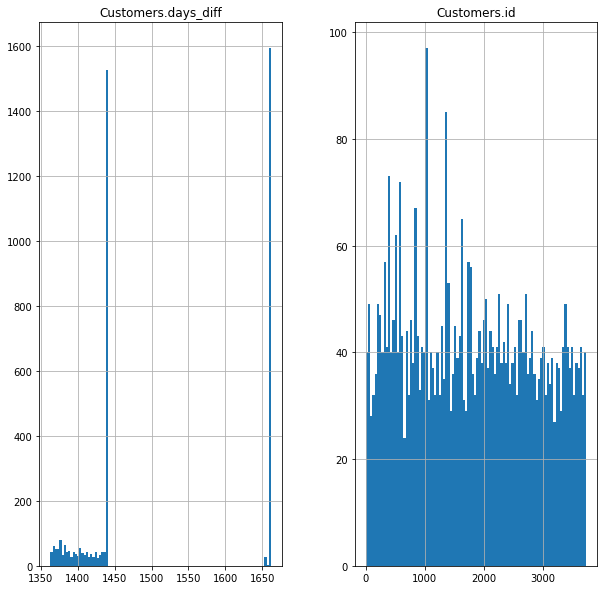

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
customer_df.hist(bins=100, figsize=(10,10))
plt.show()

In [18]:
customer_df[customer_df['Customers.id'] == 3]

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Customers.customer_type,Customers.days_diff
1,3,John,Smith,2013-12-03,2015-07-24,0,1660
2,3,John,Smith,2013-12-03,2015-07-24,0,1660


In [19]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 7 columns):
Customers.id               4194 non-null int64
Customers.fname            4194 non-null object
Customers.lname            4194 non-null object
Customers.create_date      4194 non-null object
Customers.last_modified    4194 non-null object
Customers.customer_type    4194 non-null object
Customers.days_diff        4194 non-null int64
dtypes: int64(2), object(5)
memory usage: 229.5+ KB


### Orders DataFrame

In [20]:
orders_df.head()

,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,...,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type
0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,...,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,...,1.386103e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,...,NaN,test order,Test,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,...,1.386800e+09,ebay order\rpaid by pay pal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,30,5,Abraham,Pollak,Company3,30,NaN,NaN,NaN,USD,...,1.386876e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [21]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 53 columns):
Orders.id                  4194 non-null int64
Orders.customer_id         4194 non-null int64
Orders.fname               4194 non-null object
Orders.lname               4194 non-null object
Orders.company             728 non-null object
Orders.order_number        4194 non-null object
Orders.reorder_id          82 non-null float64
Orders.external_source     365 non-null object
Orders.external_id         5 non-null float64
Orders.currency            4194 non-null object
Orders.sales_rep           0 non-null float64
Orders.subtotal            4194 non-null float64
Orders.tax                 3737 non-null float64
Orders.shipping            3999 non-null float64
Orders.coupon_id           882 non-null float64
Orders.coupon_amount       882 non-null float64
Orders.gift_id             0 non-null float64
Orders.gift_amount         0 non-null float64
Orders.fee_name            227 non-null

In [22]:
for elem in orders_df:
    if orders_df[elem].isnull().sum() > 500:
        orders_df.drop(elem, axis=1, inplace=True)

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
orders_df.isnull().sum()

Orders.id                   0
Orders.customer_id          0
Orders.fname                0
Orders.lname                0
Orders.order_number         0
Orders.currency             0
Orders.subtotal             0
Orders.tax                457
Orders.shipping           195
Orders.total                0
Orders.shipping_method    443
Orders.tracking           376
Orders.payment_status       5
Orders.payment_date        18
Orders.payment_type       384
Orders.payment_amount      18
Orders.payment_id         430
Orders.status               0
Orders.placed_date          0
Orders.updated_date        23
Orders.shipped_date       346
Orders.customer_type      183
dtype: int64

In [24]:
droplist = ['Orders.tax', 'Orders.shipping', 'Orders.shipping_method', 'Orders.tracking', 'Orders.payment_status',
            'Orders.payment_date', 'Orders.payment_type', 'Orders.payment_amount', 'Orders.payment_id',
            'Orders.updated_date', 'Orders.shipped_date', 'Orders.customer_type']
orders_df.drop(droplist, axis=1, inplace=True)

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
orders_df.isnull().sum()

Orders.id              0
Orders.customer_id     0
Orders.fname           0
Orders.lname           0
Orders.order_number    0
Orders.currency        0
Orders.subtotal        0
Orders.total           0
Orders.status          0
Orders.placed_date     0
dtype: int64

In [26]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 10 columns):
Orders.id              4194 non-null int64
Orders.customer_id     4194 non-null int64
Orders.fname           4194 non-null object
Orders.lname           4194 non-null object
Orders.order_number    4194 non-null object
Orders.currency        4194 non-null object
Orders.subtotal        4194 non-null float64
Orders.total           4194 non-null float64
Orders.status          4194 non-null int64
Orders.placed_date     4194 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 327.8+ KB


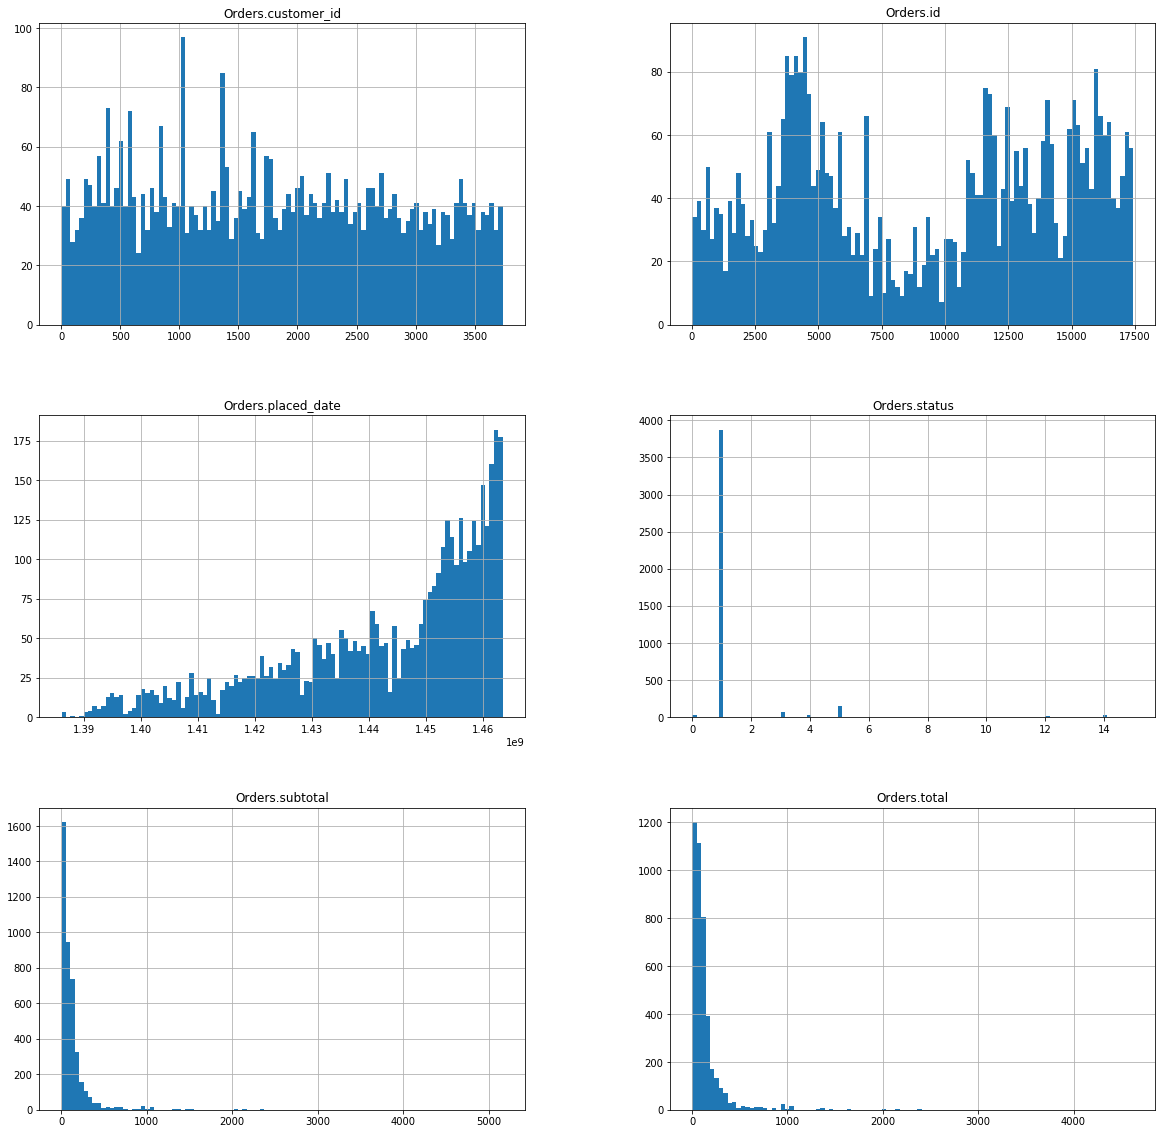

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
orders_df.hist(bins=100, figsize=(20,20))
plt.show()

In [28]:
orders_df['Orders.total'] = orders_df['Orders.total'].apply(lambda x: np.log(x))
orders_df['Orders.subtotal'] = orders_df['Orders.subtotal'].apply(lambda x: np.log(x))

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


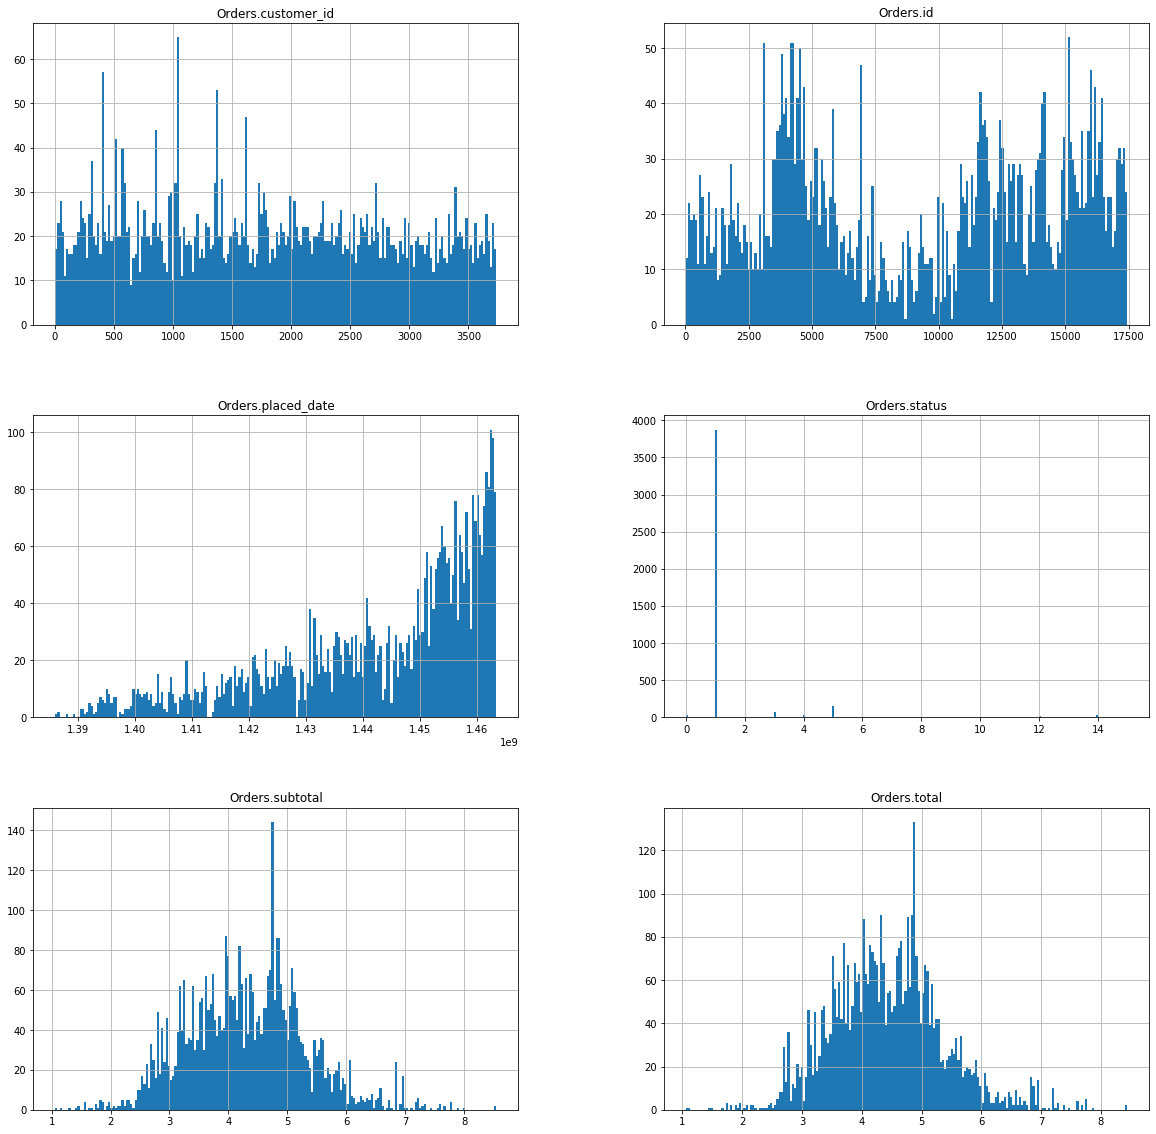

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
orders_df.hist(bins=200, figsize=(20,20))
plt.show()

In [30]:
orders_df[orders_df['Orders.total'] >3000]

,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.total,Orders.status,Orders.placed_date


### OrderItems DataFrame

In [31]:
orderitems_df.head()

,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags
0,5284,3758,2310.0,"Basic Rollators, Green",NaN,NaN,NaN,1,57.20,44.00,NaN,NaN,NaN,NaN,NaN
1,31,23,177.0,"Urinary Drain Bags,0.000",NaN,NaN,NaN,4,5.00,1.87,NaN,NaN,NaN,NaN,2.0
2,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",NaN,NaN,NaN,1,68.78,52.50,NaN,NaN,NaN,NaN,NaN
3,1816,29,983.0,Basket for 2-Button Walkers,NaN,NaN,NaN,1,19.56,12.62,NaN,NaN,NaN,NaN,NaN
4,40,30,991.0,Tens Units,NaN,NaN,NaN,1,36.05,25.75,NaN,NaN,NaN,NaN,NaN


In [32]:
orderitems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 15 columns):
Order_Items.id                   4194 non-null int64
Order_Items.parent               4194 non-null int64
Order_Items.product_id           4151 non-null float64
Order_Items.product_name         4194 non-null object
Order_Items.attributes           0 non-null float64
Order_Items.attribute_names      51 non-null object
Order_Items.attribute_prices     0 non-null float64
Order_Items.qty                  4194 non-null int64
Order_Items.price                4194 non-null float64
Order_Items.cost                 4191 non-null float64
Order_Items.registry_item        0 non-null float64
Order_Items.related_id           0 non-null float64
Order_Items.reorder_frequency    24 non-null float64
Order_Items.account_id           0 non-null float64
Order_Items.flags                1008 non-null float64
dtypes: float64(10), int64(3), object(2)
memory usage: 491.6+ KB


In [33]:
orderitems_df.isnull().sum()

Order_Items.id                      0
Order_Items.parent                  0
Order_Items.product_id             43
Order_Items.product_name            0
Order_Items.attributes           4194
Order_Items.attribute_names      4143
Order_Items.attribute_prices     4194
Order_Items.qty                     0
Order_Items.price                   0
Order_Items.cost                    3
Order_Items.registry_item        4194
Order_Items.related_id           4194
Order_Items.reorder_frequency    4170
Order_Items.account_id           4194
Order_Items.flags                3186
dtype: int64

In [34]:
for elem in orderitems_df:
    if orderitems_df[elem].isnull().sum() > 500:
        orderitems_df.drop(elem, axis=1, inplace=True)

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
orderitems_df.isnull().sum()

Order_Items.id               0
Order_Items.parent           0
Order_Items.product_id      43
Order_Items.product_name     0
Order_Items.qty              0
Order_Items.price            0
Order_Items.cost             3
dtype: int64

In [36]:
orderitems_df.dropna(inplace=True)

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


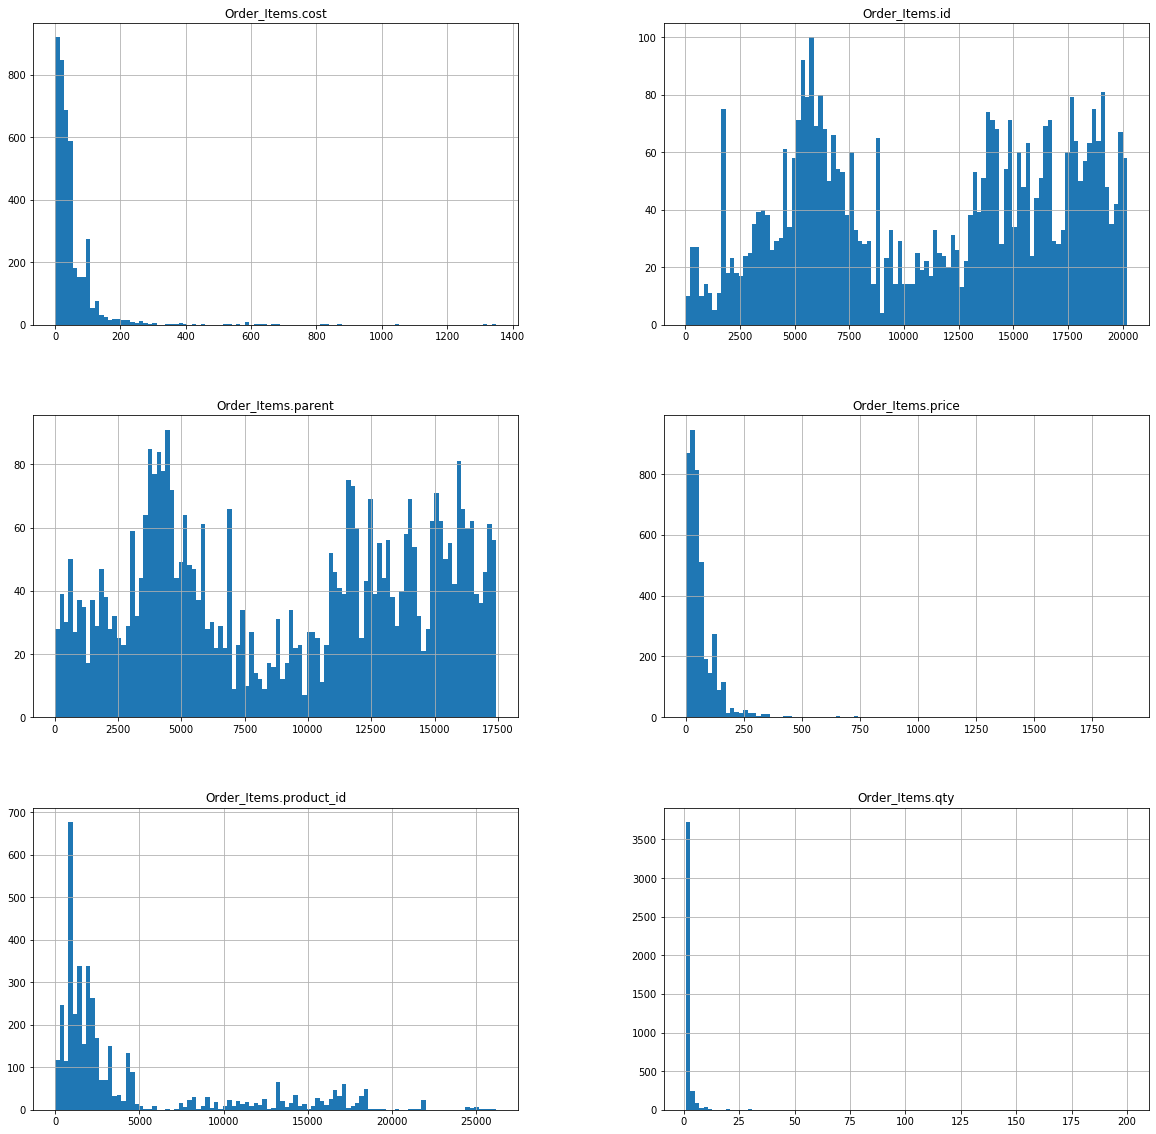

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
orderitems_df.hist(bins=100, figsize=(20,20))
plt.show()

In [38]:
orderitems_df[orderitems_df['Order_Items.price'] > 1000]

,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost
227,1849,965,2671.0,"Titan Front Wheel Power Wheelchair 20"" Captain...",1,1475.00,1049.0
872,5087,3576,2723.0,"Phoenix Heavy Duty Power Scooter, 3 Wheel",1,1149.00,819.0
1089,5532,3979,2724.0,"Phoenix Heavy Duty Power Scooter, 4 Wheel",1,1199.00,869.0
1188,5726,4153,2679.0,"Cobalt X23 Power Wheelchair, Red",1,1399.00,1050.0
1434,6268,4630,4625.0,Deluxe Sentra Heavy Duty Extra Extra Wide Whee...,1,1043.75,835.0
2280,11871,9742,2746.0,Cirrus Plus EC Folding Power Wheelchair,1,1899.00,1350.0
2969,15214,12835,3027.0,Battery Powered Electric Patient Lift with Rec...,1,1899.00,1315.0
4191,20191,17426,2707.0,Spitfire EX Travel 4-Wheel Mobility Scooter 21...,1,1099.00,675.0


In [39]:
orderitems_df['Order_Items.price'] = orderitems_df['Order_Items.price'].apply(lambda x: np.log(x))
orderitems_df['Order_Items.cost'] = orderitems_df['Order_Items.cost'].apply(lambda x: np.log(x))
#orderitems_df['Order_Items.qty'] = orderitems_df['Order_Items.qty'].apply(lambda x: np.log(x))

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


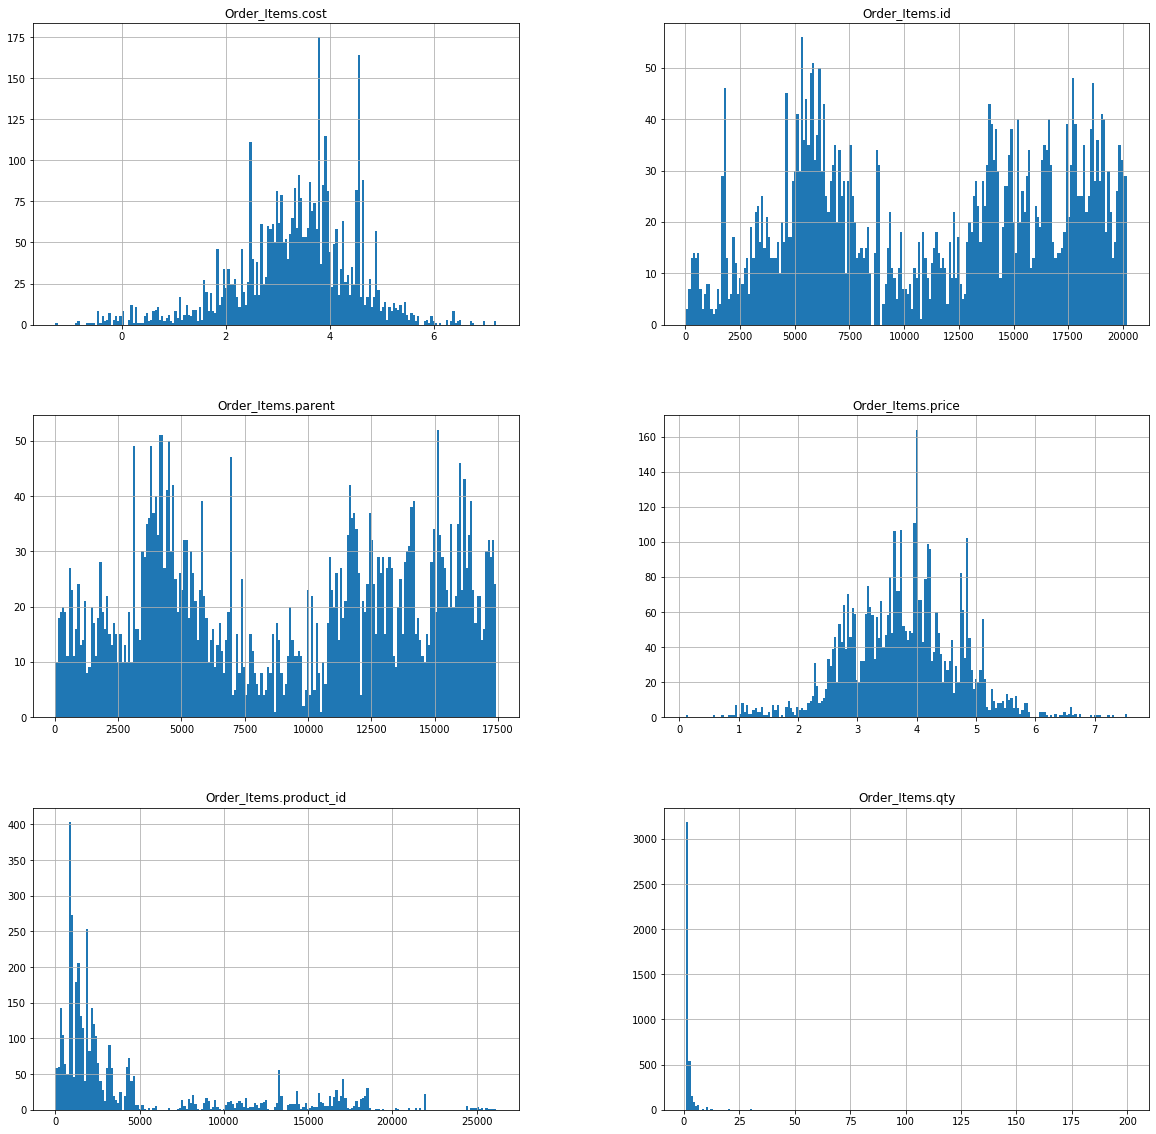

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
orderitems_df.hist(bins=200, figsize=(20,20))
plt.show()

### Products DataFrame

In [41]:
products_df.head()

,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,2310.0,0.0,NaN,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",NaN,80.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,177.0,1.0,NaN,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,NaN,14.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,1.0,0.0,NaN,sub-product-detail.html,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",NaN,96.29,...,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,983.0,0.0,NaN,sub-product-detail.html,1.0,3.0,Basket for 2-Button Walkers,Basket for 2-Button Walkers,NaN,27.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN,NaN
4,991.0,1.0,NaN,sub-product-detail.html,1.0,3.0,TENS 3000 Analog Unit,TENS 3000 Analog Unit,NaN,50.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN,NaN


In [42]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 98 columns):
Products.id                       4037 non-null float64
Products.status                   4037 non-null float64
Products.product_type             0 non-null float64
Products.template                 3973 non-null object
Products.vendor                   4037 non-null float64
Products.import_id                4037 non-null float64
Products.name                     4037 non-null object
Products.display_name             3662 non-null object
Products.menu_name                0 non-null float64
Products.list_price               4017 non-null float64
Products.price                    4036 non-null float64
Products.sale_price               1160 non-null float64
Products.cost                     4037 non-null float64
Products.flags                    2987 non-null float64
Products.left_flag                1239 non-null float64
Products.right_flag               0 non-null float64
Products.

In [43]:
products_df.isnull().sum()

Products.id               157
Products.status           157
Products.product_type    4194
Products.template         221
Products.vendor           157
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 98, dtype: int64

In [44]:
for elem in products_df:
    if products_df[elem].isnull().sum() > 500:
        products_df.drop(elem, axis=1, inplace=True)

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [45]:
products_df.isnull().sum()

Products.id                      157
Products.status                  157
Products.template                221
Products.vendor                  157
Products.import_id               157
Products.name                    157
Products.list_price              177
Products.price                   158
Products.cost                    157
Products.last_modified           157
Products.shopping_brand          162
Products.shopping_mpn            160
Products.shopping_flags          277
Products.amazon_item_type        179
Products.google_shopping_id      414
Products.google_shopping_type    215
Products.google_shopping_cat     183
Products.quickbooks_id           466
Products.qb_edit_sequence        466
Products.long_description        186
Products.seo_title               183
Products.seo_url                 157
Products.unit                    209
Products.shipping_length         196
Products.shipping_width          196
Products.shipping_height         196
Products.family_id               325
P

In [46]:
products_droplist = ['Products.import_id', 'Products.shopping_brand', 
                     'Products.shopping_mpn', 'Products.shopping_flags', 'Products.google_shopping_id',
                     'Products.quickbooks_id', 'Products.qb_edit_sequence', 'Products.long_description',
                     'Products.seo_title', 'Products.seo_url', 'Products.unit', 'Products.family_id',
                     'Products.saved_status', 'Products.template', 'Products.amazon_item_type', 
                    ]

In [47]:
products_df.drop(products_droplist, axis=1, inplace=True)

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [48]:
products_df.head()

,Products.id,Products.status,Products.vendor,Products.name,Products.list_price,Products.price,Products.cost,Products.last_modified,Products.google_shopping_type,Products.google_shopping_cat,Products.shipping_length,Products.shipping_width,Products.shipping_height
0,2310.0,0.0,1.0,"Basic Steel Rollators,Green",80.70,57.64,44.00,1.463163e+09,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,24.80,7.50,30.40
1,177.0,1.0,1.0,Urinary Drain Bags,14.41,10.29,1.87,1.462370e+09,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,8.00,7.00,1.50
2,1.0,0.0,1.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large",96.29,68.78,52.50,1.463163e+09,Apparel > Gloves > Nonsterile PF LF Synthetic ...,Health & Beauty > Health Care,13.23,10.04,10.24
3,983.0,0.0,1.0,Basket for 2-Button Walkers,27.38,19.56,12.62,1.462595e+09,"Walking Aids > Rollators, & Walkers > Walkers ...",Health & Beauty > Health Care,10.60,7.80,18.50
4,991.0,1.0,1.0,TENS 3000 Analog Unit,50.47,36.05,25.75,1.462370e+09,Physical Therapy > Electronic Muscle Stimulation,Health & Beauty > Health Care,8.50,2.75,12.00


In [49]:
products_df['Products.google_shopping_type'] = products_df['Products.google_shopping_type'].str.split(">", n = 1, expand = True)
products_df['Products.google_shopping_type'] = products_df['Products.google_shopping_type'].str.split(">", n = 1, expand = True)[0] 
products_df['Products.google_shopping_cat'] = products_df['Products.google_shopping_cat'].str.split(">", n = -1, expand = True)[2]
products_df['Products.shipping_volume'] = products_df['Products.shipping_length']*products_df['Products.shipping_width']*products_df['Products.shipping_height']
products_df.head()

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,Products.id,Products.status,Products.vendor,Products.name,Products.list_price,Products.price,Products.cost,Products.last_modified,Products.google_shopping_type,Products.google_shopping_cat,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_volume
0,2310.0,0.0,1.0,"Basic Steel Rollators,Green",80.70,57.64,44.00,1.463163e+09,Walking Aids,None,24.80,7.50,30.40,5654.400000
1,177.0,1.0,1.0,Urinary Drain Bags,14.41,10.29,1.87,1.462370e+09,"Incontinence, Urology & Ostomy",None,8.00,7.00,1.50,84.000000
2,1.0,0.0,1.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large",96.29,68.78,52.50,1.463163e+09,Apparel,None,13.23,10.04,10.24,1360.171008
3,983.0,0.0,1.0,Basket for 2-Button Walkers,27.38,19.56,12.62,1.462595e+09,Walking Aids,None,10.60,7.80,18.50,1529.580000
4,991.0,1.0,1.0,TENS 3000 Analog Unit,50.47,36.05,25.75,1.462370e+09,Physical Therapy,None,8.50,2.75,12.00,280.500000


In [50]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 14 columns):
Products.id                      4037 non-null float64
Products.status                  4037 non-null float64
Products.vendor                  4037 non-null float64
Products.name                    4037 non-null object
Products.list_price              4017 non-null float64
Products.price                   4036 non-null float64
Products.cost                    4037 non-null float64
Products.last_modified           4037 non-null float64
Products.google_shopping_type    3979 non-null object
Products.google_shopping_cat     362 non-null object
Products.shipping_length         3998 non-null float64
Products.shipping_width          3998 non-null float64
Products.shipping_height         3998 non-null float64
Products.shipping_volume         3998 non-null float64
dtypes: float64(11), object(3)
memory usage: 458.8+ KB


In [51]:
products_df['Products.google_shopping_cat'].unique()

array([None, nan, ' Mobility & Accessibility ',
       ' Biometric Monitor Accessories '], dtype=object)

In [52]:
products_df['Products.google_shopping_cat'].fillna('None', inplace = True)

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [53]:
products_df.isnull().sum()

Products.id                      157
Products.status                  157
Products.vendor                  157
Products.name                    157
Products.list_price              177
Products.price                   158
Products.cost                    157
Products.last_modified           157
Products.google_shopping_type    215
Products.google_shopping_cat       0
Products.shipping_length         196
Products.shipping_width          196
Products.shipping_height         196
Products.shipping_volume         196
dtype: int64

In [54]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 14 columns):
Products.id                      4037 non-null float64
Products.status                  4037 non-null float64
Products.vendor                  4037 non-null float64
Products.name                    4037 non-null object
Products.list_price              4017 non-null float64
Products.price                   4036 non-null float64
Products.cost                    4037 non-null float64
Products.last_modified           4037 non-null float64
Products.google_shopping_type    3979 non-null object
Products.google_shopping_cat     4194 non-null object
Products.shipping_length         3998 non-null float64
Products.shipping_width          3998 non-null float64
Products.shipping_height         3998 non-null float64
Products.shipping_volume         3998 non-null float64
dtypes: float64(11), object(3)
memory usage: 458.8+ KB


In [55]:
products_df.dropna(inplace=True)

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
products_df.head()

,Products.id,Products.status,Products.vendor,Products.name,Products.list_price,Products.price,Products.cost,Products.last_modified,Products.google_shopping_type,Products.google_shopping_cat,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_volume
0,2310.0,0.0,1.0,"Basic Steel Rollators,Green",80.70,57.64,44.00,1.463163e+09,Walking Aids,None,24.80,7.50,30.40,5654.400000
1,177.0,1.0,1.0,Urinary Drain Bags,14.41,10.29,1.87,1.462370e+09,"Incontinence, Urology & Ostomy",None,8.00,7.00,1.50,84.000000
2,1.0,0.0,1.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large",96.29,68.78,52.50,1.463163e+09,Apparel,None,13.23,10.04,10.24,1360.171008
3,983.0,0.0,1.0,Basket for 2-Button Walkers,27.38,19.56,12.62,1.462595e+09,Walking Aids,None,10.60,7.80,18.50,1529.580000
4,991.0,1.0,1.0,TENS 3000 Analog Unit,50.47,36.05,25.75,1.462370e+09,Physical Therapy,None,8.50,2.75,12.00,280.500000


In [57]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3958 entries, 0 to 4193
Data columns (total 14 columns):
Products.id                      3958 non-null float64
Products.status                  3958 non-null float64
Products.vendor                  3958 non-null float64
Products.name                    3958 non-null object
Products.list_price              3958 non-null float64
Products.price                   3958 non-null float64
Products.cost                    3958 non-null float64
Products.last_modified           3958 non-null float64
Products.google_shopping_type    3958 non-null object
Products.google_shopping_cat     3958 non-null object
Products.shipping_length         3958 non-null float64
Products.shipping_width          3958 non-null float64
Products.shipping_height         3958 non-null float64
Products.shipping_volume         3958 non-null float64
dtypes: float64(11), object(3)
memory usage: 463.8+ KB


In [58]:
products_df['Products.last_modified'] = pd.to_datetime(products_df['Products.last_modified'], unit='s')

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
products_df.head()

,Products.id,Products.status,Products.vendor,Products.name,Products.list_price,Products.price,Products.cost,Products.last_modified,Products.google_shopping_type,Products.google_shopping_cat,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_volume
0,2310.0,0.0,1.0,"Basic Steel Rollators,Green",80.70,57.64,44.00,2016-05-13 18:05:23,Walking Aids,None,24.80,7.50,30.40,5654.400000
1,177.0,1.0,1.0,Urinary Drain Bags,14.41,10.29,1.87,2016-05-04 13:52:35,"Incontinence, Urology & Ostomy",None,8.00,7.00,1.50,84.000000
2,1.0,0.0,1.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large",96.29,68.78,52.50,2016-05-13 18:05:23,Apparel,None,13.23,10.04,10.24,1360.171008
3,983.0,0.0,1.0,Basket for 2-Button Walkers,27.38,19.56,12.62,2016-05-07 04:31:15,Walking Aids,None,10.60,7.80,18.50,1529.580000
4,991.0,1.0,1.0,TENS 3000 Analog Unit,50.47,36.05,25.75,2016-05-04 13:52:35,Physical Therapy,None,8.50,2.75,12.00,280.500000


In [60]:
droplist = ['Products.status', 'Products.vendor', 'Products.last_modified', 'Products.google_shopping_cat', 'Products.shipping_length', 'Products.shipping_width', 'Products.shipping_height']

In [61]:
products_df.drop(droplist, axis=1, inplace=True)

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [62]:
products_df.head()

,Products.id,Products.name,Products.list_price,Products.price,Products.cost,Products.google_shopping_type,Products.shipping_volume
0,2310.0,"Basic Steel Rollators,Green",80.70,57.64,44.00,Walking Aids,5654.400000
1,177.0,Urinary Drain Bags,14.41,10.29,1.87,"Incontinence, Urology & Ostomy",84.000000
2,1.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large",96.29,68.78,52.50,Apparel,1360.171008
3,983.0,Basket for 2-Button Walkers,27.38,19.56,12.62,Walking Aids,1529.580000
4,991.0,TENS 3000 Analog Unit,50.47,36.05,25.75,Physical Therapy,280.500000


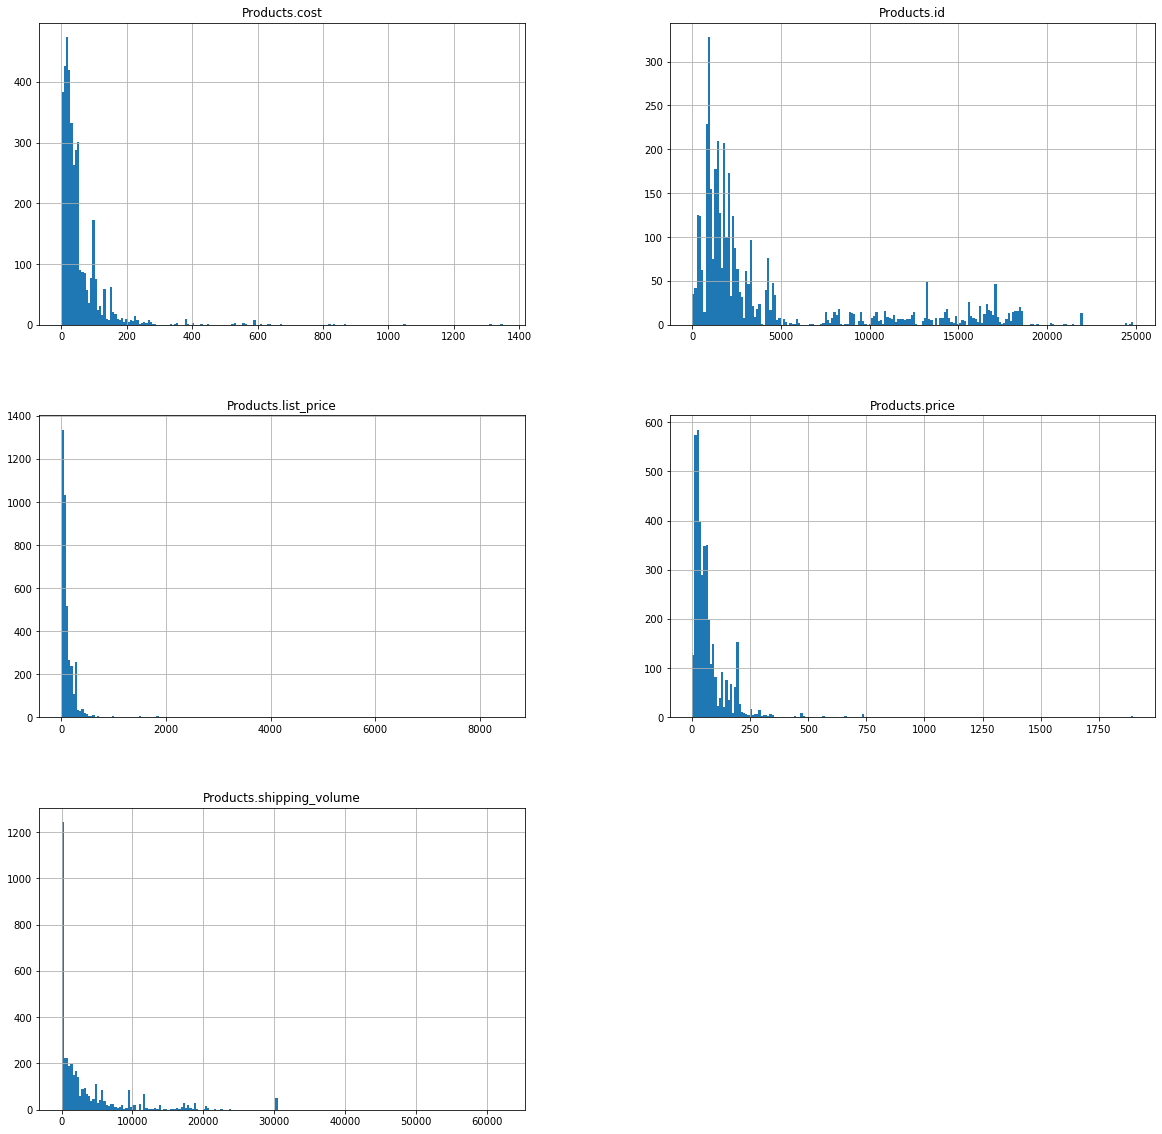

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
products_df.hist(bins=200, figsize=(20,20))
plt.show()

In [64]:
products_df['Products.cost'] = products_df['Products.cost'].apply(lambda x: np.log(x))
products_df['Products.list_price'] = products_df['Products.list_price'].apply(lambda x: np.log(x))
products_df['Products.price'] = products_df['Products.price'].apply(lambda x: np.log(x))
products_df['Products.shipping_volume'] = products_df['Products.shipping_volume'].apply(lambda x: np.log(x+1))

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

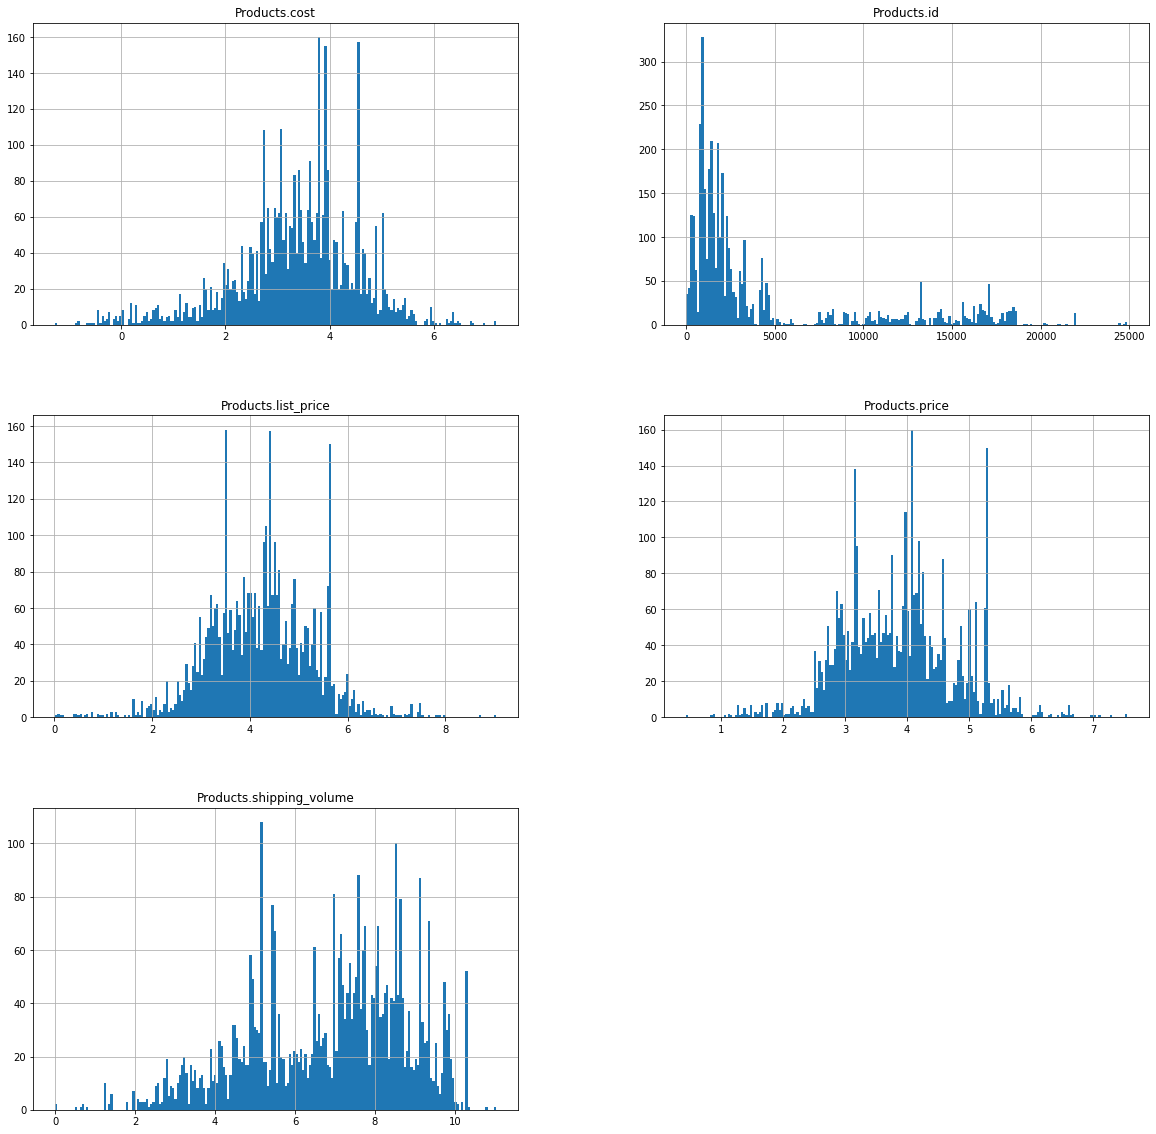

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
products_df.hist(bins=200, figsize=(20,20))
plt.show()

### Combined Dataframe

In [66]:
df = pd.concat([customer_df, products_df, orders_df, orderitems_df], axis=1, join = 'inner')

In [67]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Customers.customer_type,Customers.days_diff,Products.id,Products.name,Products.list_price,...,Orders.total,Orders.status,Orders.placed_date,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost
0,797,Christy,Dill,2015-03-10,2015-07-24,0,1660,2310.0,"Basic Steel Rollators,Green",4.390739,...,4.163404,1,1426019099,5284,3758,2310.0,"Basic Rollators, Green",1,4.046554,3.784190
1,3,John,Smith,2013-12-03,2015-07-24,0,1660,177.0,Urinary Drain Bags,2.667922,...,3.400864,1,1386090455,31,23,177.0,"Urinary Drain Bags,0.000",4,1.609438,0.625938
2,3,John,Smith,2013-12-03,2015-07-24,0,1660,1.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large",4.567364,...,4.366024,3,1449603652,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,4.230913,3.960813
3,4,James,Anderson,2013-12-11,2015-07-24,0,1660,983.0,Basket for 2-Button Walkers,3.309813,...,3.386084,1,1386780263,1816,29,983.0,Basket for 2-Button Walkers,1,2.973487,2.535283
4,5,Abraham,Pollak,2013-12-12,2015-07-24,0,1660,991.0,TENS 3000 Analog Unit,3.921379,...,3.828641,1,1386861599,40,30,991.0,Tens Units,1,3.584907,3.248435


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3956 entries, 0 to 4193
Data columns (total 31 columns):
Customers.id                     3956 non-null int64
Customers.fname                  3956 non-null object
Customers.lname                  3956 non-null object
Customers.create_date            3956 non-null object
Customers.last_modified          3956 non-null object
Customers.customer_type          3956 non-null object
Customers.days_diff              3956 non-null int64
Products.id                      3956 non-null float64
Products.name                    3956 non-null object
Products.list_price              3956 non-null float64
Products.price                   3956 non-null float64
Products.cost                    3956 non-null float64
Products.google_shopping_type    3956 non-null object
Products.shipping_volume         3956 non-null float64
Orders.id                        3956 non-null int64
Orders.customer_id               3956 non-null int64
Orders.fname                

In [69]:
df.isnull().sum().sum()

0

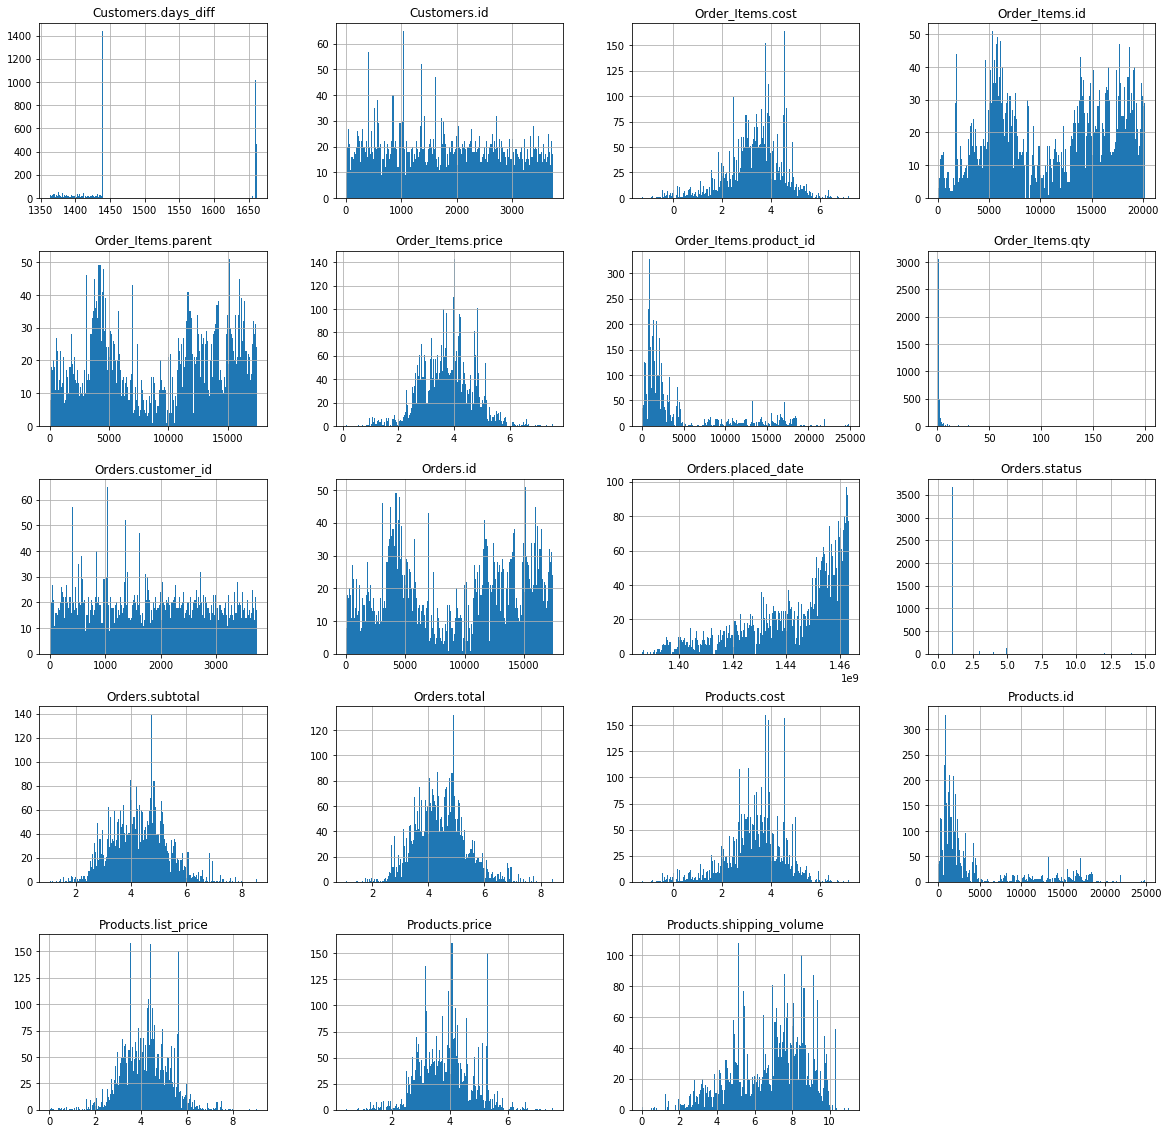

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=200, figsize=(20,20))
plt.show()

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3956 entries, 0 to 4193
Data columns (total 31 columns):
Customers.id                     3956 non-null int64
Customers.fname                  3956 non-null object
Customers.lname                  3956 non-null object
Customers.create_date            3956 non-null object
Customers.last_modified          3956 non-null object
Customers.customer_type          3956 non-null object
Customers.days_diff              3956 non-null int64
Products.id                      3956 non-null float64
Products.name                    3956 non-null object
Products.list_price              3956 non-null float64
Products.price                   3956 non-null float64
Products.cost                    3956 non-null float64
Products.google_shopping_type    3956 non-null object
Products.shipping_volume         3956 non-null float64
Orders.id                        3956 non-null int64
Orders.customer_id               3956 non-null int64
Orders.fname                

In [72]:
dfdroplist = ['Customers.fname', 'Customers.lname', 'Customers.create_date', 'Customers.last_modified', 
              'Customers.customer_type', 'Orders.id', 'Orders.customer_id', 'Orders.fname', 'Orders.lname', 
              'Orders.currency', 'Orders.placed_date', 'Order_Items.id', 'Order_Items.parent', 'Order_Items.product_id',
              'Products.list_price', 'Products.price', 'Products.cost', 'Orders.subtotal', 'Orders.status']
df.drop(dfdroplist, axis=1, inplace = True)

In [73]:
df.head()

,Customers.id,Customers.days_diff,Products.id,Products.name,Products.google_shopping_type,Products.shipping_volume,Orders.order_number,Orders.total,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost
0,797,1660,2310.0,"Basic Steel Rollators,Green",Walking Aids,8.640366,3758,4.163404,"Basic Rollators, Green",1,4.046554,3.784190
1,3,1660,177.0,Urinary Drain Bags,"Incontinence, Urology & Ostomy",4.442651,23,3.400864,"Urinary Drain Bags,0.000",4,1.609438,0.625938
2,3,1660,1.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large",Apparel,7.216101,9531,4.366024,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,4.230913,3.960813
3,4,1660,983.0,Basket for 2-Button Walkers,Walking Aids,7.333402,29,3.386084,Basket for 2-Button Walkers,1,2.973487,2.535283
4,5,1660,991.0,TENS 3000 Analog Unit,Physical Therapy,5.640132,30,3.828641,Tens Units,1,3.584907,3.248435


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3956 entries, 0 to 4193
Data columns (total 12 columns):
Customers.id                     3956 non-null int64
Customers.days_diff              3956 non-null int64
Products.id                      3956 non-null float64
Products.name                    3956 non-null object
Products.google_shopping_type    3956 non-null object
Products.shipping_volume         3956 non-null float64
Orders.order_number              3956 non-null object
Orders.total                     3956 non-null float64
Order_Items.product_name         3956 non-null object
Order_Items.qty                  3956 non-null int64
Order_Items.price                3956 non-null float64
Order_Items.cost                 3956 non-null float64
dtypes: float64(5), int64(3), object(4)
memory usage: 401.8+ KB


In [75]:
df_elbow = (pd.get_dummies(df.drop(['Customers.id', 'Products.id','Orders.order_number', 'Order_Items.product_name'], axis=1), drop_first=True))

In [76]:
df_elbow.head()

,Customers.days_diff,Products.shipping_volume,Orders.total,Order_Items.qty,Order_Items.price,Order_Items.cost,"Products.name_1/2"" self-adhesive hook material, 25 yard dispenser box, white","Products.name_1/2"" self-adhesive loop material, 25 yard dispenser box, white","Products.name_100% Cotton Unisex Reversible Hyperbaric Scrub Tops,Misty Green,MZS","Products.name_100% Cotton Unisex Reversible Tops,Ceil Blue,MHS",...,"Products.google_shopping_type_Incontinence, Urology & Ostomy",Products.google_shopping_type_OR & Surgery Supplies,Products.google_shopping_type_Patient Room And Bedding,Products.google_shopping_type_Pediatric,Products.google_shopping_type_Personal Care,Products.google_shopping_type_Pharmacy,Products.google_shopping_type_Physical Therapy,Products.google_shopping_type_Respiratory,Products.google_shopping_type_Walking Aids,Products.google_shopping_type_Wheelchairs
0,1660,8.640366,4.163404,1,4.046554,3.784190,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1660,4.442651,3.400864,4,1.609438,0.625938,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1660,7.216101,4.366024,1,4.230913,3.960813,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1660,7.333402,3.386084,1,2.973487,2.535283,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1660,5.640132,3.828641,1,3.584907,3.248435,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Elbow Plot

In [77]:
from sklearn.metrics import silhouette_score

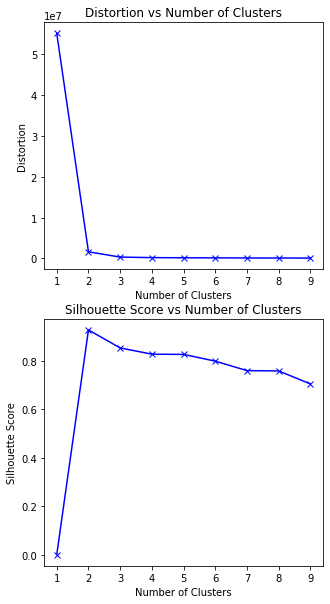

In [78]:
getelbowplot(df_elbow, 'linear', 10)

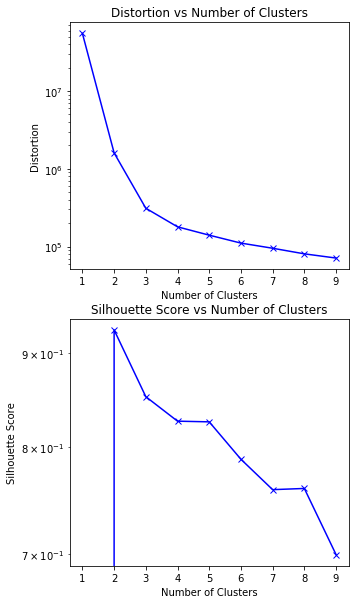

In [79]:
getelbowplot(df_elbow, 'log', 10)

In [80]:
rfm_df = pd.concat([df[['Customers.id', 'Customers.days_diff', 'Order_Items.qty', 'Orders.total']]], axis=1, join = 'inner')
rfm_df['Orders.total'] = rfm_df['Orders.total'].apply(lambda x: np.exp(x))

In [81]:
rfm_df.head()

,Customers.id,Customers.days_diff,Order_Items.qty,Orders.total
0,797,1660,1,64.29
1,3,1660,4,29.99
2,3,1660,1,78.73
3,4,1660,1,29.55
4,5,1660,1,46.00


### RFM Table

In [82]:
rfmTable = rfm_df.groupby('Customers.id').agg({ 'Customers.days_diff': (lambda x: x.min()),  
                                              'Order_Items.qty': (lambda x: (x).max()),
                                              'Orders.total':(lambda x: x.sum())})

In [83]:
rfmTable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2912 entries, 3 to 3736
Data columns (total 3 columns):
Customers.days_diff    2912 non-null int64
Order_Items.qty        2912 non-null int64
Orders.total           2912 non-null float64
dtypes: float64(1), int64(2)
memory usage: 91.0 KB


In [84]:
rfmTable.head()

,Customers.days_diff,Order_Items.qty,Orders.total
Customers.id,,,
3,1660,4,108.72
4,1660,1,29.55
5,1660,1,46.00
7,1660,1,49.14
8,1660,1,69.70


###  Number 1 Selling Product by Quantity

In [85]:
df.head()

,Customers.id,Customers.days_diff,Products.id,Products.name,Products.google_shopping_type,Products.shipping_volume,Orders.order_number,Orders.total,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost
0,797,1660,2310.0,"Basic Steel Rollators,Green",Walking Aids,8.640366,3758,4.163404,"Basic Rollators, Green",1,4.046554,3.784190
1,3,1660,177.0,Urinary Drain Bags,"Incontinence, Urology & Ostomy",4.442651,23,3.400864,"Urinary Drain Bags,0.000",4,1.609438,0.625938
2,3,1660,1.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large",Apparel,7.216101,9531,4.366024,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,4.230913,3.960813
3,4,1660,983.0,Basket for 2-Button Walkers,Walking Aids,7.333402,29,3.386084,Basket for 2-Button Walkers,1,2.973487,2.535283
4,5,1660,991.0,TENS 3000 Analog Unit,Physical Therapy,5.640132,30,3.828641,Tens Units,1,3.584907,3.248435


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3956 entries, 0 to 4193
Data columns (total 12 columns):
Customers.id                     3956 non-null int64
Customers.days_diff              3956 non-null int64
Products.id                      3956 non-null float64
Products.name                    3956 non-null object
Products.google_shopping_type    3956 non-null object
Products.shipping_volume         3956 non-null float64
Orders.order_number              3956 non-null object
Orders.total                     3956 non-null float64
Order_Items.product_name         3956 non-null object
Order_Items.qty                  3956 non-null int64
Order_Items.price                3956 non-null float64
Order_Items.cost                 3956 non-null float64
dtypes: float64(5), int64(3), object(4)
memory usage: 401.8+ KB


### Popularity of the Products Sold

In [87]:
# who are my most important customers?

In [88]:
df_pop = pd.DataFrame(df.groupby('Products.name').agg({'Order_Items.qty': (lambda x: x.sum()),  
                                                         'Orders.total':(lambda x: x.mean())}))
df_pop.head()

,Order_Items.qty,Orders.total
Products.name,,
"1-Ply Blockade AngelStat Surgical Gowns,Ceil Blue,Extra Large",1,5.459798
"1/2"" self-adhesive hook material, 25 yard dispenser box, white",1,4.021953
"1/2"" self-adhesive loop material, 25 yard dispenser box, white",1,4.021953
"100% Cotton Unisex Reversible Hyperbaric Scrub Tops,Misty Green,MZS",3,4.169873
"100% Cotton Unisex Reversible Tops,Ceil Blue,MHS",3,4.737426


In [89]:
df_pop['Total_Sold'] = df_pop['Order_Items.qty']*df_pop['Orders.total']

### Popularity by Total Revenue

In [90]:
df_pop[df_pop['Total_Sold'] == df_pop['Total_Sold'].max()]

,Order_Items.qty,Orders.total,Total_Sold
Products.name,,,
"Disposable Emergency Blanket,Not Applicable",396,6.392073,2531.260949


### Popularity by Total quanity Sold

In [91]:
df_pop[df_pop['Order_Items.qty'] == df_pop['Order_Items.qty'].max()]

,Order_Items.qty,Orders.total,Total_Sold
Products.name,,,
"Disposable Emergency Blanket,Not Applicable",396,6.392073,2531.260949


### Recommender

In [92]:
from sklearn.feature_extraction.text import CountVectorizer

In [93]:
vect = CountVectorizer(stop_words='english')
sparse_matrix = vect.fit_transform(df['Products.name'])
sparse_matrix.shape

(3956, 1629)

#### Print Sparse Matrix

In [94]:
doc_term_matrix = sparse_matrix.todense()
df_sparse = pd.DataFrame(doc_term_matrix, columns=vect.get_feature_names())
df_sparse.head()

,00,000,017,030,060,07,10,100,1000,105,...,xtra,xx,yard,yd,yellow,yes,youth,zebra,zinc,zip
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
from sklearn.metrics.pairwise import cosine_similarity

In [96]:
df_cos = pd.DataFrame(cosine_similarity(df_sparse, df_sparse))
df_cos.head()

,0,1,2,3,4,5,6,7,8,9,...,3946,3947,3948,3949,3950,3951,3952,3953,3954,3955
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.235702,0.0,0.0,0.0,0.000000
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,...,0.683763,0.0,0.0,0.09759,0.0,0.154303,0.0,0.0,0.0,0.154303
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000


In [97]:
df.shape

(3956, 12)

In [98]:
df.iloc[0]

Customers.id                                             797
Customers.days_diff                                     1660
Products.id                                             2310
Products.name                    Basic Steel Rollators,Green
Products.google_shopping_type                  Walking Aids 
Products.shipping_volume                             8.64037
Orders.order_number                                     3758
Orders.total                                          4.1634
Order_Items.product_name              Basic Rollators, Green
Order_Items.qty                                            1
Order_Items.price                                    4.04655
Order_Items.cost                                     3.78419
Name: 0, dtype: object

In [99]:
df_cos[0].sort_values(ascending=False).iloc[:10]

0       1.000000
2297    1.000000
1775    1.000000
2091    1.000000
1914    0.866025
888     0.866025
766     0.750000
1800    0.750000
794     0.750000
1353    0.750000
Name: 0, dtype: float64

In [100]:
df.iloc[1914]

Customers.id                                                                  1721
Customers.days_diff                                                           1438
Products.id                                                                   1010
Products.name                                                Basic Rollators,Green
Products.google_shopping_type                                        Walking Aids 
Products.shipping_volume                                                   9.15387
Orders.order_number                                                          11272
Orders.total                                                               4.41582
Order_Items.product_name         Basic Lightweight Rollators For Adults, With S...
Order_Items.qty                                                                  1
Order_Items.price                                                           4.2038
Order_Items.cost                                                           3.93378
Name

### Try using 'Order_Items.product_name' instead

In [101]:
df_group = pd.DataFrame(df.groupby('Products.name', as_index=False).last())
df_group.shape

(1343, 12)

In [102]:
df_group.head()

,Products.name,Customers.id,Customers.days_diff,Products.id,Products.google_shopping_type,Products.shipping_volume,Orders.order_number,Orders.total,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost
0,"1-Ply Blockade AngelStat Surgical Gowns,Ceil B...",2691,1438,9460.0,Apparel,7.462674,13603,5.459798,"1-Ply Blockade AngelStat Surgical Gowns, Ceil ...",1,5.459798,5.236655
1,"1/2"" self-adhesive hook material, 25 yard disp...",3566,1373,18028.0,Daily Living Aids,4.976734,16761,4.021953,"1/2"" self-adhesive hook material, 25 yard disp...",1,3.146305,2.708050
2,"1/2"" self-adhesive loop material, 25 yard disp...",3566,1373,18031.0,Daily Living Aids,4.976734,16761,4.021953,"1/2"" self-adhesive loop material, 25 yard disp...",1,3.146305,2.708050
3,100% Cotton Unisex Reversible Hyperbaric Scrub...,1761,1438,5182.0,Apparel,4.262680,9323,4.462108,100% Cotton Unisex Reversible Hyperbaric Scrub...,2,2.905260,2.467252
4,"100% Cotton Unisex Reversible Tops,Ceil Blue,MHS",2168,1438,5145.0,Apparel,4.262680,11427,4.737426,"100% Cotton Unisex Reversible Tops, Ceil Blue,...",3,2.880882,2.321407


In [103]:
vect = CountVectorizer(stop_words='english')
sparse_matrix = vect.fit_transform(df_group['Order_Items.product_name'])
sparse_matrix.shape

(1343, 1715)

In [104]:
doc_term_matrix = sparse_matrix.todense()
df_sparse = pd.DataFrame(doc_term_matrix, columns=vect.get_feature_names())
df_sparse.head()

,00,000,07,10,100,1000,10226,105,10x13,11,...,zebra,zinc,zip,ìâåâìä,ìä,ìäå,õìâå,û_ìâå,û_ìâåáìä,ûê
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
df_cos = pd.DataFrame(cosine_similarity(df_sparse, df_sparse))
df_cos.head()

,0,1,2,3,4,5,6,7,8,9,...,1333,1334,1335,1336,1337,1338,1339,1340,1341,1342
0,1.000000,0.000000,0.000000,0.000000,0.235702,0.0,0.000000,0.000000,0.125988,0.0,...,0.136083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.000000,1.000000,0.888889,0.000000,0.000000,0.0,0.666667,0.777778,0.125988,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.000000,0.888889,1.000000,0.000000,0.000000,0.0,0.777778,0.888889,0.125988,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.000000,0.000000,0.000000,1.000000,0.559017,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111803
4,0.235702,0.000000,0.000000,0.559017,1.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125000


In [106]:
df_group.iloc[0]

Products.name                    1-Ply Blockade AngelStat Surgical Gowns,Ceil B...
Customers.id                                                                  2691
Customers.days_diff                                                           1438
Products.id                                                                   9460
Products.google_shopping_type                                             Apparel 
Products.shipping_volume                                                   7.46267
Orders.order_number                                                          13603
Orders.total                                                                5.4598
Order_Items.product_name         1-Ply Blockade AngelStat Surgical Gowns, Ceil ...
Order_Items.qty                                                                  1
Order_Items.price                                                           5.4598
Order_Items.cost                                                           5.23665
Name

In [107]:
df_cos[0].sort_values(ascending=False).iloc[:10]

0       1.000000
1264    0.632456
1263    0.444444
865     0.353553
324     0.353553
694     0.333333
864     0.333333
66      0.316228
693     0.316228
1017    0.301511
Name: 0, dtype: float64

In [108]:
df_group.iloc[1264]

Products.name                    Unisex Blockade Antistatic Barrier Backless Go...
Customers.id                                                                  2168
Customers.days_diff                                                           1438
Products.id                                                                   5231
Products.google_shopping_type                                             Apparel 
Products.shipping_volume                                                   3.54818
Orders.order_number                                                          11427
Orders.total                                                               4.73743
Order_Items.product_name         Unisex Blockade Antistatic Barrier Backless Go...
Order_Items.qty                                                                  2
Order_Items.price                                                          3.23278
Order_Items.cost                                                           2.86106
Name

In [109]:
df_group.iloc[1263]

Products.name                    Unisex Blockade Antistatic Barrier Backless Go...
Customers.id                                                                  2778
Customers.days_diff                                                           1431
Products.id                                                                   5232
Products.google_shopping_type                                             Apparel 
Products.shipping_volume                                                   3.54818
Orders.order_number                                                          13936
Orders.total                                                               4.71268
Order_Items.product_name         Unisex Blockade Antistatic Barrier Backless Go...
Order_Items.qty                                                                  4
Order_Items.price                                                          3.23278
Order_Items.cost                                                           2.86106
Name

### Try removing Numbers from df_group

In [110]:
df_group['Order_Items.product_name'].head()

0    1-Ply Blockade AngelStat Surgical Gowns, Ceil ...
1    1/2" self-adhesive hook material, 25 yard disp...
2    1/2" self-adhesive loop material, 25 yard disp...
3    100% Cotton Unisex Reversible Hyperbaric Scrub...
4    100% Cotton Unisex Reversible Tops, Ceil Blue,...
Name: Order_Items.product_name, dtype: object

In [111]:
import re

In [112]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", ' ', text)
    text = re.sub(r'\d+', '', text)
    return text

In [113]:
df_group['Order_Items.product_name_mod'] = df_group['Order_Items.product_name'].apply(lambda x: preprocess_text(x))

In [114]:
df_group.head()

,Products.name,Customers.id,Customers.days_diff,Products.id,Products.google_shopping_type,Products.shipping_volume,Orders.order_number,Orders.total,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.product_name_mod
0,"1-Ply Blockade AngelStat Surgical Gowns,Ceil B...",2691,1438,9460.0,Apparel,7.462674,13603,5.459798,"1-Ply Blockade AngelStat Surgical Gowns, Ceil ...",1,5.459798,5.236655,ply blockade angelstat surgical gowns ceil b...
1,"1/2"" self-adhesive hook material, 25 yard disp...",3566,1373,18028.0,Daily Living Aids,4.976734,16761,4.021953,"1/2"" self-adhesive hook material, 25 yard disp...",1,3.146305,2.708050,self adhesive hook material yard dispense...
2,"1/2"" self-adhesive loop material, 25 yard disp...",3566,1373,18031.0,Daily Living Aids,4.976734,16761,4.021953,"1/2"" self-adhesive loop material, 25 yard disp...",1,3.146305,2.708050,self adhesive loop material yard dispense...
3,100% Cotton Unisex Reversible Hyperbaric Scrub...,1761,1438,5182.0,Apparel,4.262680,9323,4.462108,100% Cotton Unisex Reversible Hyperbaric Scrub...,2,2.905260,2.467252,cotton unisex reversible hyperbaric scrub to...
4,"100% Cotton Unisex Reversible Tops,Ceil Blue,MHS",2168,1438,5145.0,Apparel,4.262680,11427,4.737426,"100% Cotton Unisex Reversible Tops, Ceil Blue,...",3,2.880882,2.321407,cotton unisex reversible tops ceil blue mhs


In [115]:
vect = CountVectorizer(stop_words='english')
sparse_matrix = vect.fit_transform(df_group['Order_Items.product_name_mod'])
sparse_matrix.shape

(1343, 1564)

In [116]:
doc_term_matrix = sparse_matrix.todense()
df_sparse = pd.DataFrame(doc_term_matrix, columns=vect.get_feature_names())
df_sparse.head()

,abbott,abdominal,abducted,abduction,able,absolute,absorbent,accessories,accessory,accu,...,xl,xtra,xx,yard,yellow,yes,youth,zebra,zinc,zip
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
df_sparse.shape

(1343, 1564)

In [118]:
df_cos = pd.DataFrame(cosine_similarity(df_sparse, df_sparse), columns=df_group['Products.id'].tolist())
df_cos.head()

,9460.0,18028.0,18031.0,5182.0,5145.0,829.0,18024.0,18018.0,1672.0,857.0,...,11783.0,1961.0,11788.0,1957.0,13285.0,385.0,234.0,4611.0,16187.0,15714.0
0,1.000000,0.000,0.000,0.000000,0.251976,0.0,0.000,0.000,0.125988,0.0,...,0.136083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,1.000,0.875,0.000000,0.000000,0.0,0.750,0.750,0.133631,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.875,1.000,0.000000,0.000000,0.0,0.875,0.875,0.133631,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000,0.000,1.000000,0.503953,0.0,0.000,0.000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.251976,0.000,0.000,0.503953,1.000000,0.0,0.000,0.000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
df_group.iloc[0]

Products.name                    1-Ply Blockade AngelStat Surgical Gowns,Ceil B...
Customers.id                                                                  2691
Customers.days_diff                                                           1438
Products.id                                                                   9460
Products.google_shopping_type                                             Apparel 
Products.shipping_volume                                                   7.46267
Orders.order_number                                                          13603
Orders.total                                                                5.4598
Order_Items.product_name         1-Ply Blockade AngelStat Surgical Gowns, Ceil ...
Order_Items.qty                                                                  1
Order_Items.price                                                           5.4598
Order_Items.cost                                                           5.23665
Orde

In [120]:
df_group.iloc[1017]

Products.name                    SensiCare Ice Blue Nitrile Exam Gloves,Violet ...
Customers.id                                                                  1616
Customers.days_diff                                                           1438
Products.id                                                                    785
Products.google_shopping_type                                             Apparel 
Products.shipping_volume                                                   7.80344
Orders.order_number                                                          12994
Orders.total                                                               6.07208
Order_Items.product_name         SensiCare Ice Blue Nitrile Exam Gloves, Violet...
Order_Items.qty                                                                  1
Order_Items.price                                                          5.06139
Order_Items.cost                                                           4.75393
Orde

In [121]:
df_group.iloc[1000]

Products.name                     Rollator Replacement Parts
Customers.id                                            2880
Customers.days_diff                                     1422
Products.id                                             1000
Products.google_shopping_type                  Walking Aids 
Products.shipping_volume                             7.13423
Orders.order_number                                    14225
Orders.total                                         3.45663
Order_Items.product_name         Rollator Replacement Basket
Order_Items.qty                                            1
Order_Items.price                                    3.08007
Order_Items.cost                                     2.64191
Order_Items.product_name_mod     rollator replacement basket
Name: 1000, dtype: object

In [122]:
df_cos[1000].sort_values(ascending=False).iloc[:10]

1000    1.000000
11      0.408248
1295    0.408248
1001    0.333333
543     0.333333
1046    0.333333
135     0.333333
452     0.333333
1292    0.333333
1296    0.333333
Name: 1000.0, dtype: float64

In [123]:
df_group.iloc[543]

Products.name                    Folding Walker Basket
Customers.id                                      3421
Customers.days_diff                               1380
Products.id                                       3313
Products.google_shopping_type            Walking Aids 
Products.shipping_volume                       6.06539
Orders.order_number                              16267
Orders.total                                   4.42053
Order_Items.product_name         Folding Walker Basket
Order_Items.qty                                      1
Order_Items.price                              3.36867
Order_Items.cost                               3.03206
Order_Items.product_name_mod     folding walker basket
Name: 543, dtype: object

In [124]:
df_group[df_group['Products.id'] == 5182]

,Products.name,Customers.id,Customers.days_diff,Products.id,Products.google_shopping_type,Products.shipping_volume,Orders.order_number,Orders.total,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.product_name_mod
3,100% Cotton Unisex Reversible Hyperbaric Scrub...,1761,1438,5182.0,Apparel,4.26268,9323,4.462108,100% Cotton Unisex Reversible Hyperbaric Scrub...,2,2.90526,2.467252,cotton unisex reversible hyperbaric scrub to...


In [125]:
df_group.iloc[3]

Products.name                    100% Cotton Unisex Reversible Hyperbaric Scrub...
Customers.id                                                                  1761
Customers.days_diff                                                           1438
Products.id                                                                   5182
Products.google_shopping_type                                             Apparel 
Products.shipping_volume                                                   4.26268
Orders.order_number                                                           9323
Orders.total                                                               4.46211
Order_Items.product_name         100% Cotton Unisex Reversible Hyperbaric Scrub...
Order_Items.qty                                                                  2
Order_Items.price                                                          2.90526
Order_Items.cost                                                           2.46725
Orde

In [126]:
df_cos[5182].sort_values(ascending=False).iloc[:10]

3       1.000000
1262    0.824958
72      0.666667
71      0.555556
4       0.503953
843     0.444444
339     0.444444
70      0.444444
844     0.333333
69      0.316228
Name: 5182.0, dtype: float64

In [127]:
df_group.head()

,Products.name,Customers.id,Customers.days_diff,Products.id,Products.google_shopping_type,Products.shipping_volume,Orders.order_number,Orders.total,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.product_name_mod
0,"1-Ply Blockade AngelStat Surgical Gowns,Ceil B...",2691,1438,9460.0,Apparel,7.462674,13603,5.459798,"1-Ply Blockade AngelStat Surgical Gowns, Ceil ...",1,5.459798,5.236655,ply blockade angelstat surgical gowns ceil b...
1,"1/2"" self-adhesive hook material, 25 yard disp...",3566,1373,18028.0,Daily Living Aids,4.976734,16761,4.021953,"1/2"" self-adhesive hook material, 25 yard disp...",1,3.146305,2.708050,self adhesive hook material yard dispense...
2,"1/2"" self-adhesive loop material, 25 yard disp...",3566,1373,18031.0,Daily Living Aids,4.976734,16761,4.021953,"1/2"" self-adhesive loop material, 25 yard disp...",1,3.146305,2.708050,self adhesive loop material yard dispense...
3,100% Cotton Unisex Reversible Hyperbaric Scrub...,1761,1438,5182.0,Apparel,4.262680,9323,4.462108,100% Cotton Unisex Reversible Hyperbaric Scrub...,2,2.905260,2.467252,cotton unisex reversible hyperbaric scrub to...
4,"100% Cotton Unisex Reversible Tops,Ceil Blue,MHS",2168,1438,5145.0,Apparel,4.262680,11427,4.737426,"100% Cotton Unisex Reversible Tops, Ceil Blue,...",3,2.880882,2.321407,cotton unisex reversible tops ceil blue mhs


In [128]:
df_group.index.values.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [129]:
df_cos[5182].sort_values(ascending=False).iloc[:10]

3       1.000000
1262    0.824958
72      0.666667
71      0.555556
4       0.503953
843     0.444444
339     0.444444
70      0.444444
844     0.333333
69      0.316228
Name: 5182.0, dtype: float64

In [130]:
df_group.head()

,Products.name,Customers.id,Customers.days_diff,Products.id,Products.google_shopping_type,Products.shipping_volume,Orders.order_number,Orders.total,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.product_name_mod
0,"1-Ply Blockade AngelStat Surgical Gowns,Ceil B...",2691,1438,9460.0,Apparel,7.462674,13603,5.459798,"1-Ply Blockade AngelStat Surgical Gowns, Ceil ...",1,5.459798,5.236655,ply blockade angelstat surgical gowns ceil b...
1,"1/2"" self-adhesive hook material, 25 yard disp...",3566,1373,18028.0,Daily Living Aids,4.976734,16761,4.021953,"1/2"" self-adhesive hook material, 25 yard disp...",1,3.146305,2.708050,self adhesive hook material yard dispense...
2,"1/2"" self-adhesive loop material, 25 yard disp...",3566,1373,18031.0,Daily Living Aids,4.976734,16761,4.021953,"1/2"" self-adhesive loop material, 25 yard disp...",1,3.146305,2.708050,self adhesive loop material yard dispense...
3,100% Cotton Unisex Reversible Hyperbaric Scrub...,1761,1438,5182.0,Apparel,4.262680,9323,4.462108,100% Cotton Unisex Reversible Hyperbaric Scrub...,2,2.905260,2.467252,cotton unisex reversible hyperbaric scrub to...
4,"100% Cotton Unisex Reversible Tops,Ceil Blue,MHS",2168,1438,5145.0,Apparel,4.262680,11427,4.737426,"100% Cotton Unisex Reversible Tops, Ceil Blue,...",3,2.880882,2.321407,cotton unisex reversible tops ceil blue mhs


In [139]:
idlist = df_cos[5182].sort_values(ascending=False).iloc[:10].index.tolist()

In [140]:
idlist

[3, 1262, 72, 71, 4, 843, 339, 70, 844, 69]

3       5182.0
4       5145.0
69      5249.0
70      4910.0
71      4942.0
72      5104.0
339     6801.0
843     5616.0
844     5507.0
1262    5171.0
Name: Products.id, dtype: float64

In [144]:
df_group.Index.isin(idlist)['Products.id']

AttributeError: 'DataFrame' object has no attribute 'Index'

In [163]:
def GetSimilarProducts_Cosine(Product_id):
    
    idlist = df_cos[Product_id].sort_values(ascending=False).iloc[:10].index.tolist()
    overlap = df_cos[Product_id].sort_values(ascending=False).iloc[:10].tolist()
    Product_id = df_group[df_group.index.isin(idlist)]['Products.id']
    Product_name = df_group[df_group.index.isin(idlist)]['Order_Items.product_name']
    
    SimilarProduct = pd.DataFrame({'Product ID': Product_id, 'Overlap' : overlap, 'Product Name': Product_name})
    
    return SimilarProduct
    

In [164]:
Similar = GetSimilarProducts_Cosine(5182)

In [165]:
Similar

,Product ID,Overlap,Product Name
3,5182.0,1.000000,100% Cotton Unisex Reversible Hyperbaric Scrub...
4,5145.0,0.824958,"100% Cotton Unisex Reversible Tops, Ceil Blue,..."
69,5249.0,0.666667,AngelStat Unisex Elastic Waist Cargo Scrub Pan...
70,4910.0,0.555556,AngelStat Unisex Reversible Drawstring Scrub P...
71,4942.0,0.503953,AngelStat Unisex Reversible Drawstring Scrub P...
72,5104.0,0.444444,"AngelStat Unisex Reversible V-Neck Scrub Tops,..."
339,6801.0,0.444444,ComfortEase Unisex One-Pocket Reversible Scrub...
843,5616.0,0.444444,PerforMAX Unisex One-Pocket Reversible Scrub T...
844,5507.0,0.333333,PerforMAX Unisex Reversible Drawstring Scrub P...
1262,5171.0,0.316228,"Unisex 100% Cotton Reversible Scrub Pants, Mis..."


In [ ]:
idlist = df_cos[5182].sort_values(ascending=False).iloc[:10].index.tolist()

In [ ]:
idlist

In [ ]:
df_group[df_group['Products.id'] == 3]

In [ ]:
df_group[df_group['Products.id']==3]

In [ ]:
df_group.head()

In [ ]:
df_productid = df_group.groupby('Products.id', as_index=False).last()

In [ ]:
vect = CountVectorizer(stop_words='english')
sparse_matrix = vect.fit_transform(df_productid['Order_Items.product_name_mod'])
sparse_matrix.shape

In [ ]:
doc_term_matrix = sparse_matrix.todense()
df_sparse = pd.DataFrame(doc_term_matrix, columns=vect.get_feature_names())
df_sparse.head()

In [ ]:
df_cos = pd.DataFrame(cosine_similarity(df_sparse, df_sparse), columns=df_group['Products.id'].tolist())
df_cos.head()

In [ ]:
def GetSimilarProducts_Cosine(Product_id):
    
    idlist = df_cos[Product_id].sort_values(ascending=False).iloc[:10].index.tolist()
    overlap = df_cos[Product_id].sort_values(ascending=False).iloc[:10].tolist()
    SimilarProduct = pd.DataFrame({ 'Product ID': idlist,
                                   'Overlap' : overlap})
    return SimilarProduct

In [ ]:
GetSimilarProducts_Cosine(5182)

In [ ]:

#number 1 selling product and buyer -  by dollar amount and total quantity sold are two ways to go about it.

#co-occurency matrix
#matrix factorization

#utility matrix look up
#customer vs products with quantity filling vals



In [ ]:
pwd